# Convolutional Neural Network Architecture

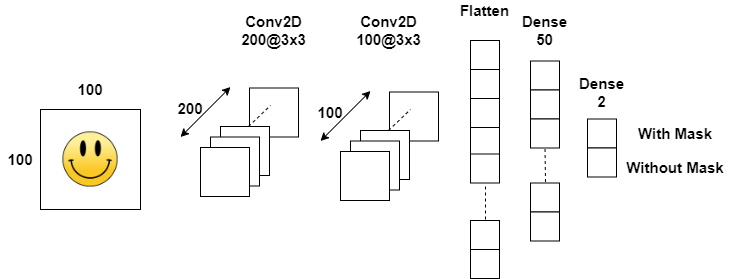

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Train on 2751 samples, validate on 688 samples
Epoch 1/20
2751/2751 [==============================] - 426s 155ms/step - loss: 0.5981 - accuracy: 0.6634 - val_loss: 0.5515 - val_accuracy: 0.7064
Epoch 2/20
2751/2751 [==============================] - 428s 156ms/step - loss: 0.4562 - accuracy: 0.7808 - val_loss: 0.3959 - val_accuracy: 0.8212
Epoch 3/20
2751/2751 [==============================] - 391s 142ms/step - loss: 0.3366 - accuracy: 0.8462 - val_loss: 0.3390 - val_accuracy: 0.8503
Epoch 4/20
2751/2751 [==============================] - 385s 140ms/step - loss: 0.2885 - accuracy: 0.8677 - val_loss: 0.3156 - val_accuracy: 0.8547
Epoch 5/20
2751/2751 [==============================] - 309s 112ms/step - loss: 0.2279 - accuracy: 0.9091 - val_loss: 0.2621 - val_accuracy: 0.8939
Epoch 6/20
2751/2751 [==============================] - 253s 92ms/step - loss: 0.1929 - accuracy: 0.9200 - val_loss: 0.2658 - val_accuracy: 0.8895
Epoch 7/20
2751/2751 [==============================] - 240s 87ms

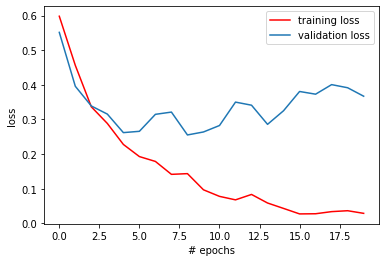

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

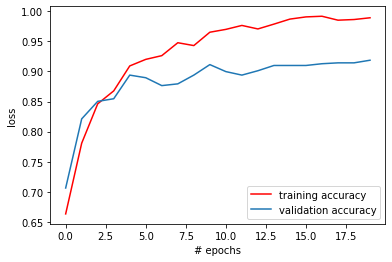

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

383/383 [==============================] - 9s 23ms/step
[0.28180978484159974, 0.9295039176940918]
